In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
df1 = pd.read_csv('/content/daily_42101_2024.csv')
df2 = pd.read_csv('/content/daily_42401_2024.csv')
df3 = pd.read_csv('/content/daily_42602_2024.csv')
df4 = pd.read_csv('/content/daily_44201_2024.csv')

<ipython-input-60-93fe6f5898d5>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/daily_42101_2024.csv')


In [ ]:
# Combine the datasets
combined_df = pd.concat([df1, df2, df3,df4], ignore_index=True)


In [ ]:
# Remove duplicates
combined_df.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values
combined_df['AQI'].fillna(combined_df['AQI'].mean(), inplace=True)
combined_df.dropna(subset=['Local Site Name', 'CBSA Name'], inplace=True)

<ipython-input-63-8e77b3a48302>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['AQI'].fillna(combined_df['AQI'].mean(), inplace=True)


In [ ]:
#Outlier Handling: Capping outliers in 'AQI' and 'Arithmetic Mean' (based on 99th percentile)
aqi_cap = combined_df['AQI'].quantile(0.99)
arithmetic_mean_cap = combined_df['Arithmetic Mean'].quantile(0.99)

combined_df['AQI'] = np.where(combined_df['AQI'] > aqi_cap, aqi_cap, combined_df['AQI'])
combined_df['Arithmetic Mean'] = np.where(combined_df['Arithmetic Mean'] > arithmetic_mean_cap, arithmetic_mean_cap, combined_df['Arithmetic Mean'])


In [ ]:
#Normalization: Applying Min-Max Scaling to numeric columns
scaler = MinMaxScaler()
numeric_cols = ['AQI', 'Arithmetic Mean', '1st Max Value', 'Observation Count', 'Observation Percent']
combined_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])

In [ ]:
#Encoding Categorical Variables: One-Hot Encoding for 'State Name' and 'County Name'
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Replaced 'sparse' with 'sparse_output'
encoded_categorical = encoder.fit_transform(combined_df[['State Name', 'County Name']])

In [ ]:
# Convert encoded categorical features to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['State Name', 'County Name']))

In [ ]:
# Concatenate the encoded columns with the original dataset and drop the old categorical columns
final_df = pd.concat([combined_df.drop(['State Name', 'County Name'], axis=1), encoded_df], axis=1)


In [ ]:
#droping the County Name_,State Name_ formatted columns
df_cleaned = final_df.loc[:, ~final_df.columns.str.contains('County Name_|State Name_')]

In [ ]:
#converting dataframe to csv
df_cleaned .to_csv('combined_air_quality.csv', index=False)

In [ ]:
print(df_cleaned.columns)
print(df_cleaned.dtypes)

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'City Name', 'CBSA Name',
       'Date of Last Change'],
      dtype='object')
State Code             float64
County Code            float64
Site Num               float64
Parameter Code         float64
POC                    float64
Latitude               float64
Longitude              float64
Datum                   object
Parameter Name          object
Sample Duration         object
Pollutant Standard      object
Date Local              object
Units of Measure        object
Event Type              object
Observation Count      float64
Observation Percent    float64
Arithmetic Me

In [ ]:
#dataset before removing the County Name_,State Name_ formatted columns after concatinating the datasets
final_df.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,County Name_Wood,County Name_Woodbury,County Name_Worcester,County Name_Wright,County Name_Wyandotte,County Name_Yavapai,County Name_Yellowstone,County Name_Yolo,County Name_York,County Name_Yuma
0,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316730 entries, 0 to 286242
Columns: 608 entries, State Code to County Name_Yuma
dtypes: float64(595), object(13)
memory usage: 1.4+ GB


In [ ]:
final_df.shape

(316730, 608)

In [ ]:
#dataset after removing the County Name_,State Name_ formatted columns after concatinating the datasets
df_cleaned.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,City Name,CBSA Name,Date of Last Change
0,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.009600,3.0,0.314392,554.0,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Anchorage,"Anchorage, AK",2024-06-28
1,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.005741,22.0,0.314392,554.0,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Anchorage,"Anchorage, AK",2024-06-28
2,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.005734,8.0,0.314392,554.0,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Anchorage,"Anchorage, AK",2024-06-28
3,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.005080,10.0,0.314392,554.0,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Anchorage,"Anchorage, AK",2024-06-28
4,2.0,20.0,18.0,42101.0,1.0,61.205861,-149.824602,WGS84,Carbon monoxide,1 HOUR,...,0.008588,16.0,0.314392,554.0,INSTRUMENTAL - Gas Filter Correlation Thermo E...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Anchorage,"Anchorage, AK",2024-06-28


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316730 entries, 0 to 286242
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           287799 non-null  float64
 1   County Code          287799 non-null  float64
 2   Site Num             287799 non-null  float64
 3   Parameter Code       287799 non-null  float64
 4   POC                  287799 non-null  float64
 5   Latitude             287799 non-null  float64
 6   Longitude            287799 non-null  float64
 7   Datum                287799 non-null  object 
 8   Parameter Name       287799 non-null  object 
 9   Sample Duration      287799 non-null  object 
 10  Pollutant Standard   287799 non-null  object 
 11  Date Local           287799 non-null  object 
 12  Units of Measure     287799 non-null  object 
 13  Event Type           4339 non-null    object 
 14  Observation Count    287799 non-null  float64
 15  Observation Percent  2

In [ ]:
df_cleaned.shape

(316730, 27)

#**Visualizations**

In [ ]:
# Set style for plots
sns.set(style="whitegrid")

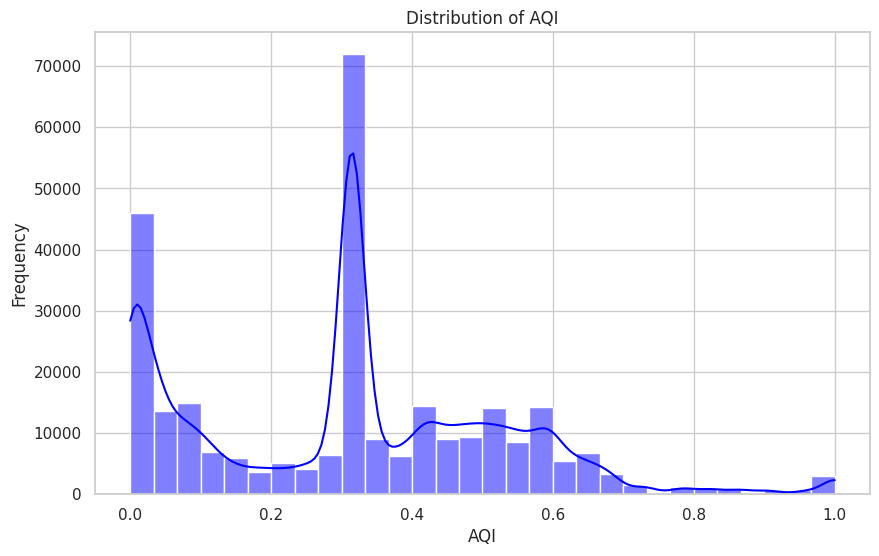

In [ ]:
#Distribution of AQI (Air Quality Index)
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['AQI'], kde=True, bins=30, color='blue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

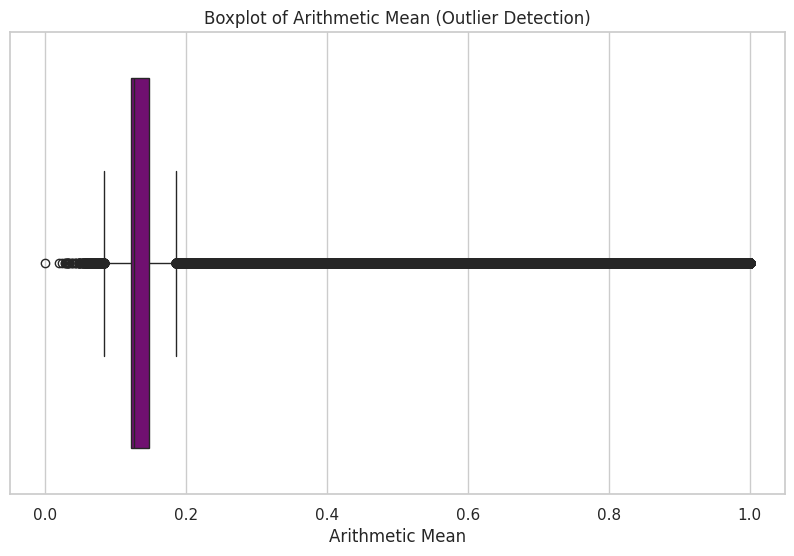

In [ ]:
#Boxplot for Arithmetic Mean to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df['Arithmetic Mean'], color='purple')
plt.title('Boxplot of Arithmetic Mean (Outlier Detection)')
plt.xlabel('Arithmetic Mean')
plt.show()

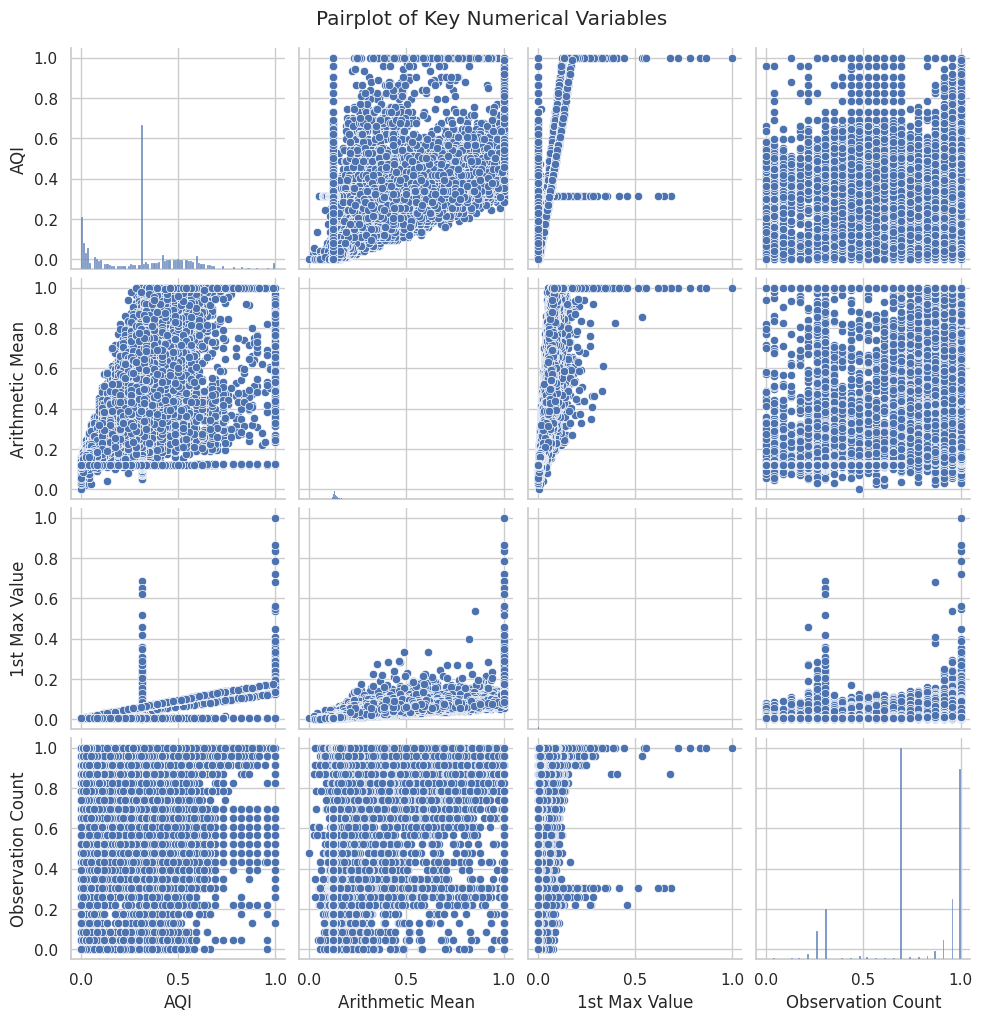

In [ ]:
#Pairplot for key numerical variables
numerical_cols = ['AQI', 'Arithmetic Mean', '1st Max Value', 'Observation Count']
sns.pairplot(combined_df[numerical_cols])
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.show()

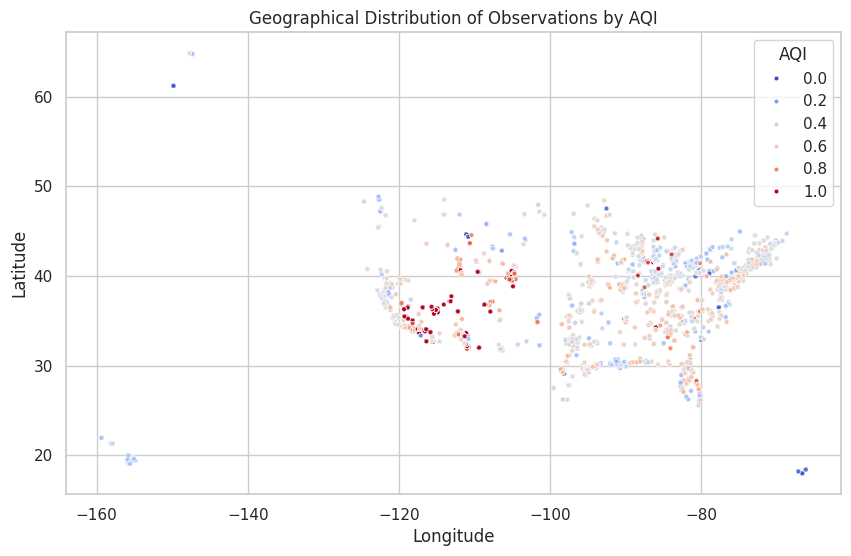

In [ ]:
#Scatter plot of Latitude vs Longitude to understand geographical distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='AQI', data=combined_df, palette='coolwarm', s=10)
plt.title('Geographical Distribution of Observations by AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

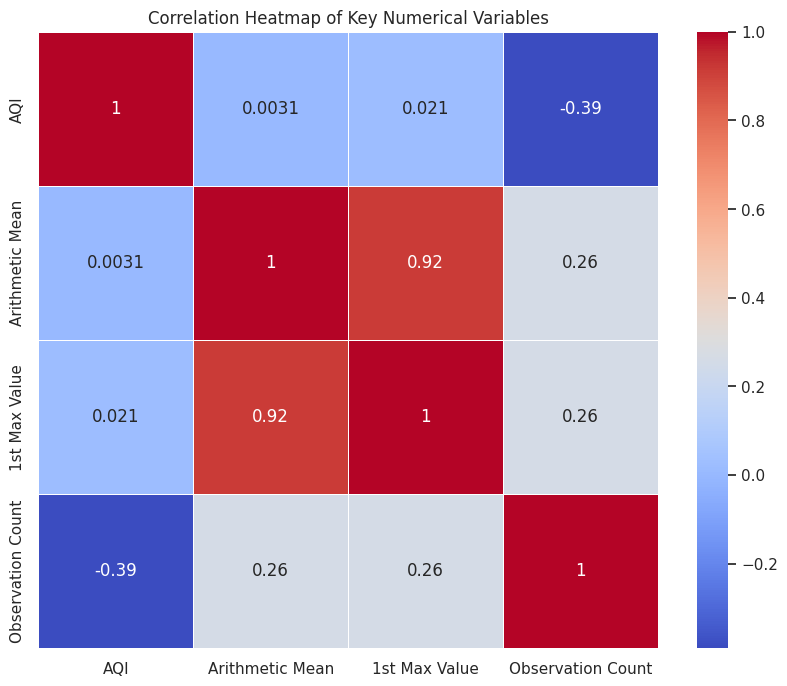

In [ ]:
#Heatmap of correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()

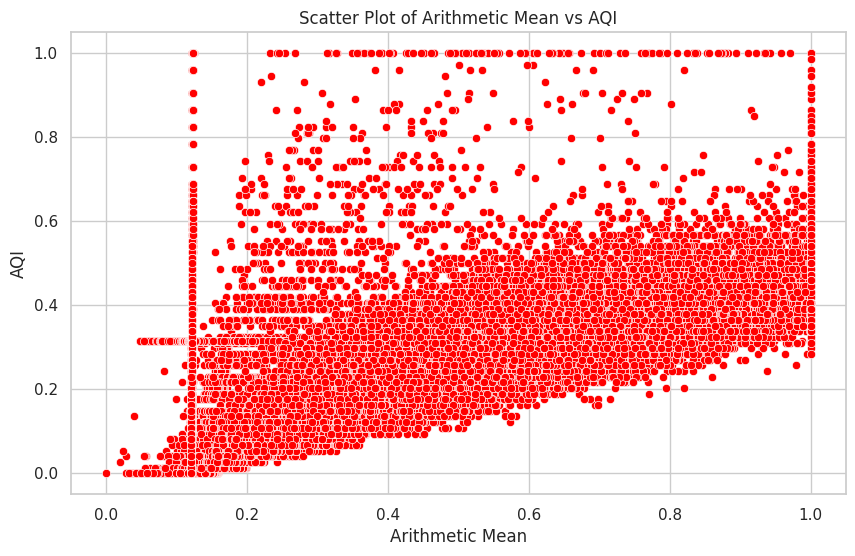

In [ ]:
#Scatter plot of AQI vs Arithmetic Mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arithmetic Mean', y='AQI', data=combined_df, color='red')
plt.title('Scatter Plot of Arithmetic Mean vs AQI')
plt.xlabel('Arithmetic Mean')
plt.ylabel('AQI')
plt.show()

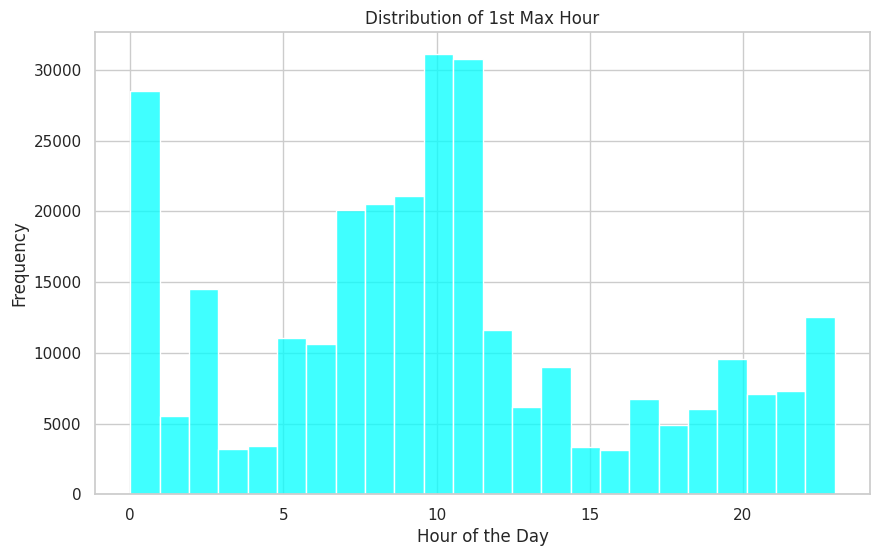

In [ ]:
#Distribution of 1st Max Hour to check for any patterns across the day
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['1st Max Hour'], kde=False, bins=24, color='cyan')
plt.title('Distribution of 1st Max Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

<ipython-input-94-2f0888844a87>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date Local', y='AQI', data=combined_df, ci=None)


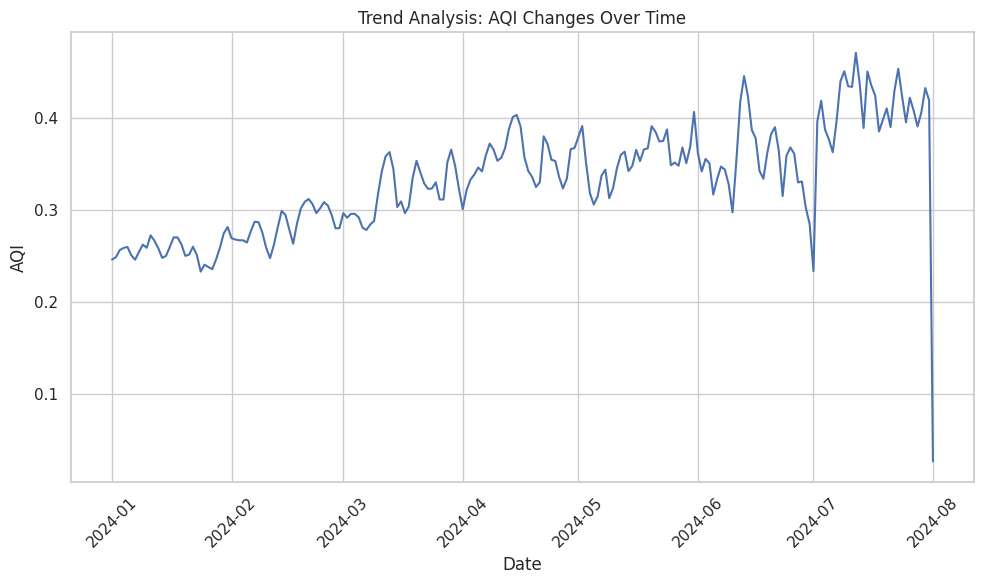

In [ ]:
combined_df['Date Local'] = pd.to_datetime(combined_df['Date Local'])

#Trend Analysis AQI changes over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date Local', y='AQI', data=combined_df, ci=None)
plt.title('Trend Analysis: AQI Changes Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()

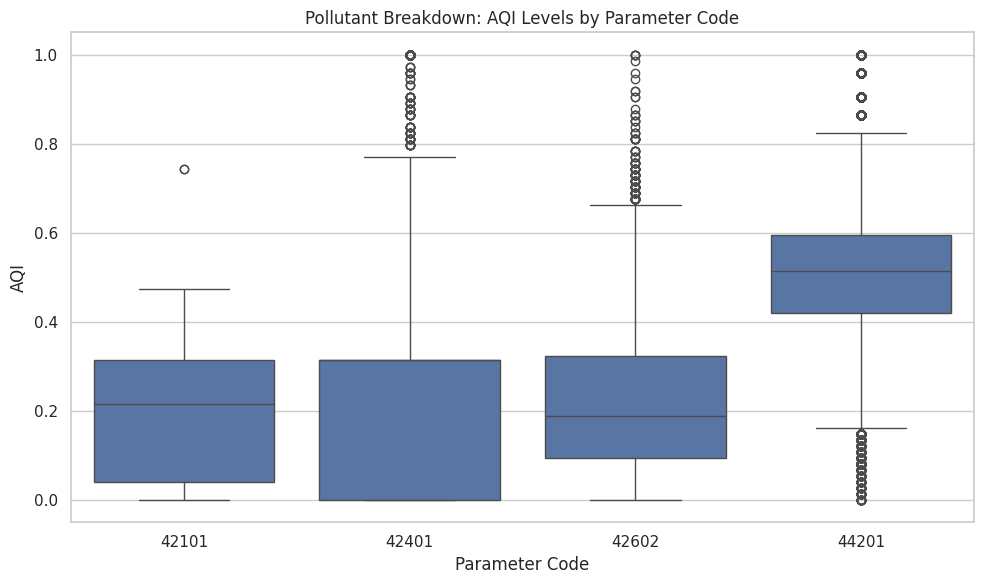

In [ ]:
#Pollutant Breakdown - Contribution to poor air quality (high AQI)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parameter Code', y='AQI', data=combined_df)
plt.title('Pollutant Breakdown: AQI Levels by Parameter Code')
plt.xlabel('Parameter Code')
plt.ylabel('AQI')
plt.tight_layout()

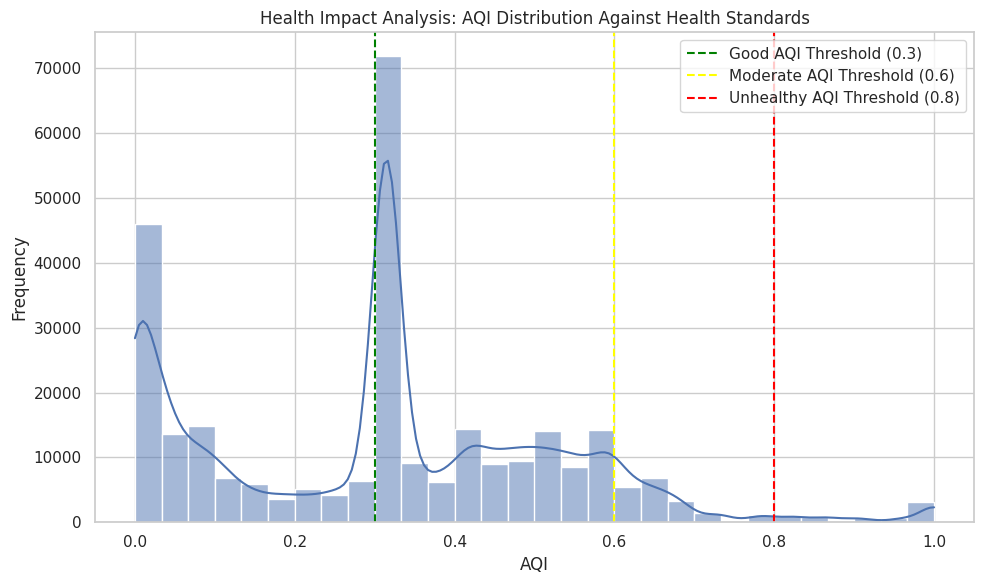

In [ ]:
#Health Impact Analysis - AQI distribution against health standards
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['AQI'], bins=30, kde=True)
plt.axvline(x=0.3, color='green', linestyle='--', label='Good AQI Threshold (0.3)')
plt.axvline(x=0.6, color='yellow', linestyle='--', label='Moderate AQI Threshold (0.6)')
plt.axvline(x=0.8, color='red', linestyle='--', label='Unhealthy AQI Threshold (0.8)')

plt.legend()
plt.title('Health Impact Analysis: AQI Distribution Against Health Standards')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


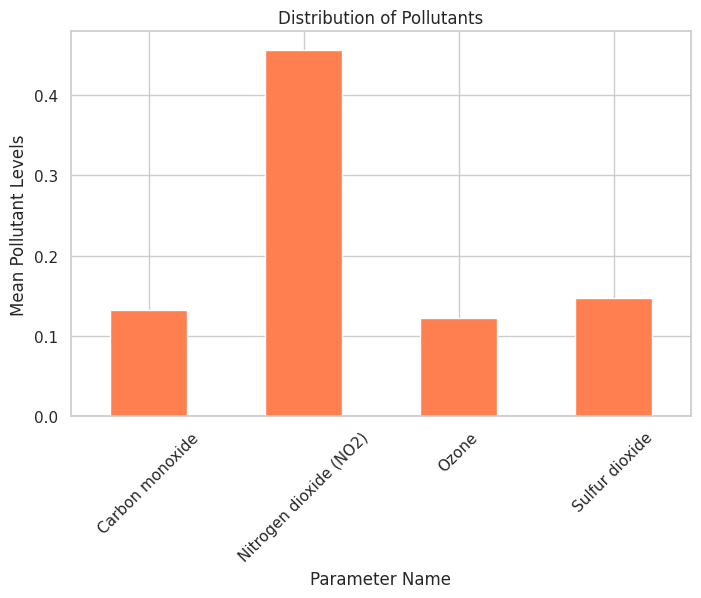

In [ ]:
# Distribution of 'Arithmetic Mean' by pollutant
pollutant_distribution = df_cleaned.groupby('Parameter Name')['Arithmetic Mean'].mean()

# Bar plot for pollutant distribution
pollutant_distribution.plot(kind='bar', color='coral', figsize=(8, 5))
plt.title('Distribution of Pollutants')
plt.ylabel('Mean Pollutant Levels')
plt.xticks(rotation=45)
plt.show()

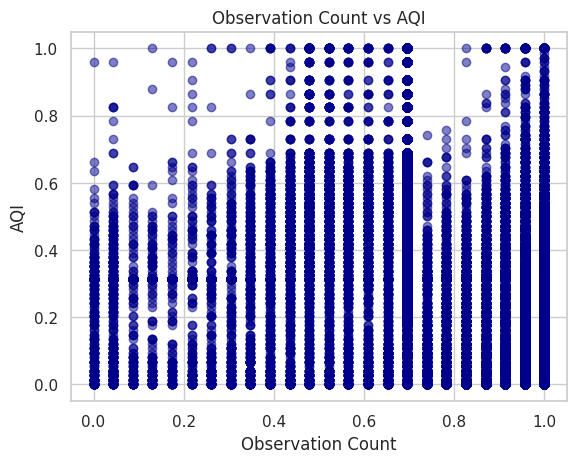

In [ ]:
# Scatter Plot of Observation Count vs. Air Quality Index (AQI)
plt.scatter(df_cleaned['Observation Count'],df_cleaned['AQI'], alpha=0.5, color='darkblue')
plt.title('Observation Count vs AQI')
plt.xlabel('Observation Count')
plt.ylabel('AQI')
plt.show()


<ipython-input-104-4de39ef2b0a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='County Name', y='AQI', data=state_data, palette='Set2')


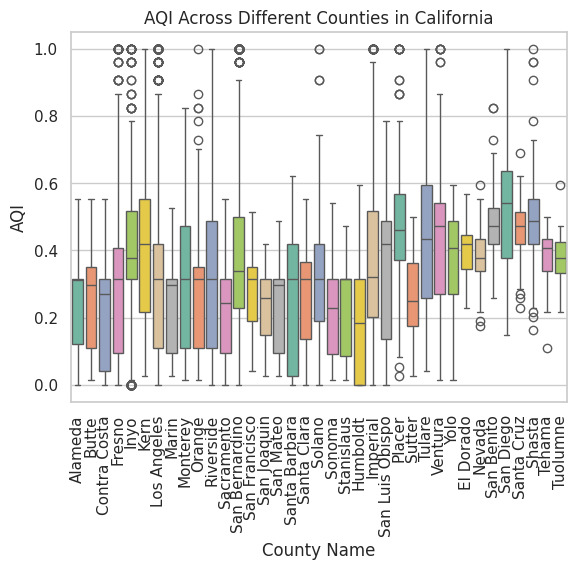

In [ ]:
# Box Plot of AQI Across Different Counties in California
state_data = combined_df[combined_df['State Name'] == 'California']  # You can choose any state
sns.boxplot(x='County Name', y='AQI', data=state_data, palette='Set2')
plt.title('AQI Across Different Counties in California')
plt.xticks(rotation=90)
plt.show()


<ipython-input-106-0d23863097da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='County Name', y='AQI', data=state_data, palette='Set2')


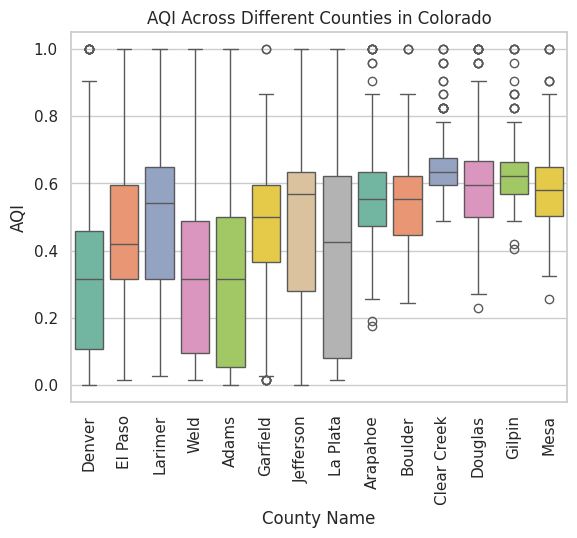

In [ ]:
# Box Plot of AQI Across Different Counties in California
state_data = combined_df[combined_df['State Name'] == 'Colorado']  # You can choose any state
sns.boxplot(x='County Name', y='AQI', data=state_data, palette='Set2')
plt.title('AQI Across Different Counties in Colorado')
plt.xticks(rotation=90)
plt.show()